# Analysis of PCNA

In [3]:
import mdtraj as md
import numpy as np

# Load trajectory file
traj = md.load("/home/wowjason/work/projects/md_lect/pcna/all.fit.1ns.xtc", top="/home/wowjason/work/projects/md_lect/pcna/now.pdb")
n_frames = traj.n_frames

print(traj)
print(n_frames)

<mdtraj.Trajectory with 17990 frames, 13191 atoms, 969 residues, and unitcells>
17990


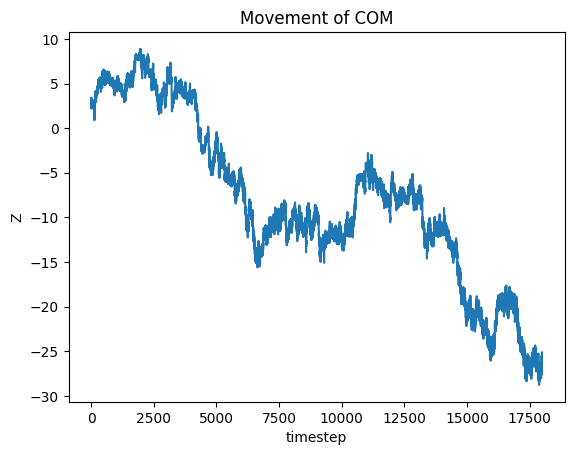

In [4]:
import tqdm
import matplotlib.pyplot as plt

# Calculate the center of mass of pcna
com = md.compute_center_of_mass(traj, select="chainid 0 to 2")
plt.figure()
plt.title("Movement of COM")
plt.xlabel("timestep")
plt.ylabel("Z")
plt.plot(com[:, 2])
plt.show()

**Calculate MSDs of PCNA**

$MSD(t)=\frac{1}{N}\displaystyle\sum_{i=1}^{N}\frac{1}{T-t}\displaystyle\sum_{\tau=1}^{T-t}\vert r^{(i)}(\tau+T)-r^{(i)}(\tau) \vert^2$

In [7]:
msds_pcna = []

# Caculating MSD of POPC and water
for n_dt in range(1, n_frames):
    displacements = com[n_dt:, :] - com[:-n_dt, :]
    squared_displacements = np.sum(displacements**2, axis=-1)
    mean_squared_displacement_pcna = np.mean(squared_displacements)
    msds_pcna.append(mean_squared_displacement_pcna)

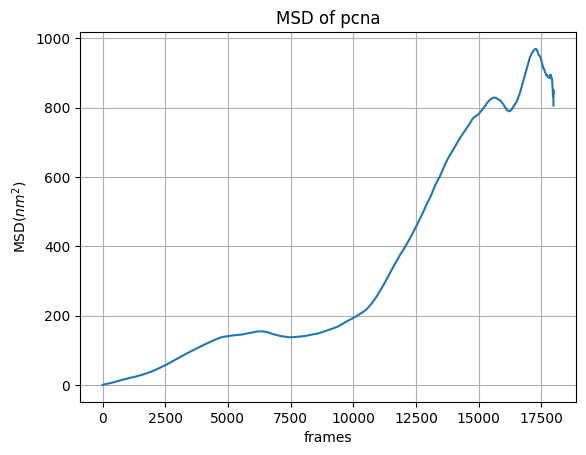

In [10]:
# Plot MSD of pcna
plt.figure()
plt.plot(msds_pcna)
plt.title("MSD of pcna")
plt.xlabel("frames")
plt.ylabel(r"MSD($nm^2$)")
plt.grid()
plt.show()

**Calculate Diffusion coefficient for 1D**  
$2D\Delta t=MSD$

In [12]:
from scipy.stats import linregress

# Make time array.
time = np.arange(200, n_frames)

# Diffusion coefficient is a slope of MSD.
# Calculate diffusion coefficient of pcna
slope, _, _, _, _ = linregress(time, msds_pcna[199:])
diffusion_coefficient_pcna = slope / 2

print(f"Diffusion coefficient of water: {diffusion_coefficient_pcna:.4f} x 10\u207B\u2079 (m\u00b2/s)")

Diffusion coefficient of water: 0.0272 x 10⁻⁹ (m²/s)


### Rotation

In [11]:
com_A = md.compute_center_of_mass(traj, select="chainid 0")
com_A_xy = com_A[:, :2]

theta = np.arctan2(com_A_xy[:, 1], com_A_xy[:, 0])
degree = np.degrees(theta)

In [17]:
theta_degree = theta * 180 / (2 * np.pi)
init_theta_degree = theta_degree[0]
d_theta_degree = np.diff(theta_degree)


array([-0.074743  ,  1.13833677, -1.82143791, ...,  2.12405898,
       -0.56177164, -0.79617386])

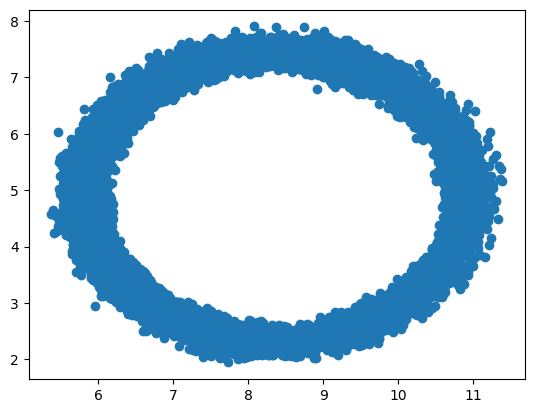

In [63]:
plt.figure()
plt.scatter(com_A_xy[:, 0], com_A_xy[:, 1])
plt.show()

(17990, 2), (17990, 2)
0.22205259130157137


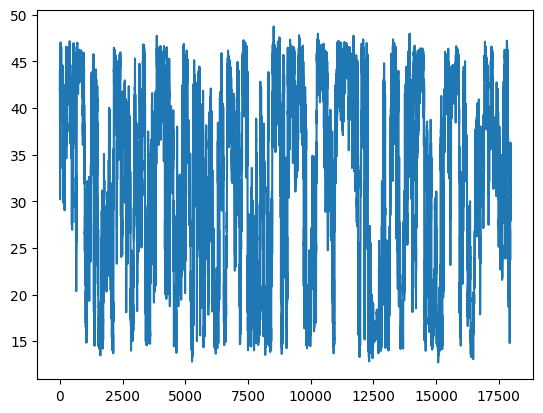

In [83]:
x_axis = np.repeat(np.array([[1, 0]]), n_frames, axis=0)

print(f"{x_axis.shape}, {com_A_xy.shape}")

dot_product = np.sum(x_axis * com_A_xy, axis=-1)
norm_com_A = np.linalg.norm(com_A_xy, axis=-1)
theta = np.arccos(dot_product / norm_com_A)
degree = np.degrees(theta)

print(min(theta))

plt.figure()
plt.plot(degree)
plt.show()